imports

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
file = open('distance_color_type_for_all_stars.txt', 'r')
file_csv = open('distance_color_type_for_all_stars_new.csv', 'w')
remove_list = ['ASASSN','distance_pc=', 'J=', 'K=', 'MabsJ=', 'A_J=', 'A_K=', 'MLType=', 'VisType=', 'VSXType=', 'VSX_RA_Dec_Name=', 'FinalType=']
header = ['ASASSN_id', 'distance', 'distance_low', 'distance_high', 'J_mag', 'J_mag_err', 'K_mag', 'K_mag_err', 'abs_mag_J', 'abs_mag_J_low', 'abs_mag_J_high', 'ext_correct_J', 'ext_correct_J_low', 'ext_correct_J_high', 'ext_correct_K', 'ext_correct_K_low', 'ext_correct_K_high', 'FinalType', 'ML_classifier_type', 'visual_classification_type', 'VSX_type', 'VSX_RA', 'VSX_Dec', 'VSX_name']

file_csv.write(','.join(header) + '\n')

lines = file.readlines()
for line in lines:
    line_split = line.split()
    if line_split[27][-1] == ',':
        line_split[27] = line_split[27][:-1]
    if len(line_split) > 34:
        line_split[33] = ' '.join(line_split[33:])
    del line_split[34:]
    for item in remove_list:
        if item in line_split:
            line_split.remove(item)

    print(line_split)
    file_csv.write(','.join(line_split) + '\n')

['8590948612', '3778', '3484', '4082', '12.151', '0.022', '11.815', '0.023', '-0.771', '-0.595', '-0.939', '0.036', '0.036', '0.036', '0.015', '0.015', '0.015', 'RRAB', 'RRL_ab', 'NA', 'RRAB', '0.01521 +35.36286 GM And']
['661428773073', '5833', '4946', '7076', '14.476', '0.033', '14.085', '0.066', '+0.625', '+0.983', '+0.205', '0.022', '0.022', '0.022', '0.009', '0.009', '0.009', 'RRAB', 'RRL_ab', 'NA', 'RRAB', '0.01669 +18.40698 CSS_J000004.0+182425']
['128850052915', '5463', '4555', '6859', '14.994', '0.052', '14.761', '0.124', '+1.264', '+1.659', '+0.770', '0.043', '0.043', '0.043', '0.019', '0.019', '0.019', 'RRAB', 'RRL_ab', 'NA', 'RRAB', '0.03171 +34.67397 SERIV 27']
['661427539170', '10226', '8430', '12243', '14.736', '0.044', '14.356', '0.091', '-0.335', '+0.085', '-0.725', '0.022', '0.022', '0.022', '0.009', '0.009', '0.009', 'RRAB', 'RRL_ab', 'NA', 'RRAB', '0.06821 -72.77875 BP Tuc']
['661428842978', '4131', '3828', '4440', '13.082', '0.031', '12.683', '0.027', '-0.099', '+0

In [73]:
color_csv = pd.read_csv('distance_color_type_for_all_stars_new.csv')

In [74]:
color_csv["FinalType"].unique()

array(['RRAB', 'RRC', 'RR(B)', 'CONSTANT', 'POSSIBLY', "I'D", 'EB', 'EW',
       'BY', 'EA', 'SR:', 'SRA', 'CONST', 'SXPHE', 'RS', 'RRC/EW', 'TRUE',
       'L', 'SRB', 'RRAB/CWB', 'RRD', 'NEEDS', 'GDOR:', 'DSCT', 'BY:',
       'NEED', 'INS', 'PROBABLY', 'GDOR', 'BY/DCEP', 'EW?', 'LIKELY',
       'SR', 'SRD', 'NO', 'RRC/EW?', 'DCEP', 'RRC?', 'CWA:', 'NONVAR',
       'LPV_SRV_AGB_C', 'CEPH_1O', 'LPV_MIRA_AGB_C', 'CEPH_OTHER',
       'CORRUPTED', 'CEP', 'LPV_OSARG_AGB', 'LPV_SRV_AGB_O', 'CONSTANT?',
       'CEPH_F', 'T2CEPH', 'LPV_MIRA_AGB_O', 'LPV_OSARG_RGB'],
      dtype=object)

In [75]:
exclude_distance_99999 = color_csv[color_csv["distance"] < 99998]
exclude_distance_99999

ASASSN_id  distance  distance_low  distance_high   J_mag  J_mag_err  \
0        8590948612      3778          3484           4082  12.151      0.022   
1      661428773073      5833          4946           7076  14.476      0.033   
2      128850052915      5463          4555           6859  14.994      0.052   
3      661427539170     10226          8430          12243  14.736      0.044   
4      661428842978      4131          3828           4440  13.082      0.031   
...             ...       ...           ...            ...     ...        ...   
25393  472447133837      4426          4108           4813  13.445      0.025   
25394  283468348278      4310          3755           4843  14.001      0.027   
25395  601296002455      7238          6247           9348  14.337      0.032   
25396  644246075250      9021          7142          11992  14.853      0.039   
25397   94490254633      5823          5081           6654  14.196      0.035   

        K_mag  K_mag_err  abs_mag_J  abs_mag_J_low  ...  ext_correct_K  \
0      11.815      0.023     -0.771         -0.595  ...          0.015   
1      14.085      0.066      0.625          0.983  ...          0.009   
2      14.761      0.124      1.264          1.659  ...          0.019   
3      14.356      0.091     -0.335          0.085  ...          0.009   
4      12.683      0.027     -0.099          0.066  ...          0.043   
...       ...        ...        ...            ...  ...            ...   
25393  13.195      0.031      0.215          0.377  ...          0.000   
25394  13.809      0.056      0.829          1.128  ...          0.000   
25395  14.078      0.069      0.039          0.359  ...          0.000   
25396  14.640      0.088      0.068          0.575  ...          0.004   
25397  13.776      0.050      0.298          0.594  ...          0.031   

       ext_correct_K_low  ext_correct_K_high  FinalType  ML_classifier_type  \
0                  0.015               0.015       RRAB              RRL_ab   
1                  0.009               0.009       RRAB              RRL_ab   
2                  0.019               0.019       RRAB              RRL_ab   
3                  0.009               0.009       RRAB              RRL_ab   
4                  0.043               0.043       RRAB              RRL_ab   
...                  ...                 ...        ...                 ...   
25393              0.000               0.000     NONVAR              NonVar   
25394              0.000               0.000        RRC               RRL_c   
25395              0.000               0.000       DSCT                DSCT   
25396              0.004               0.004     NONVAR              NonVar   
25397              0.031               0.031        RRC               RRL_c   

       visual_classification_type  VSX_type  \
0                             NaN      RRAB   
1                             NaN      RRAB   
2                             NaN      RRAB   
3                             NaN      RRAB   
4                             NaN      RRAB   
...                           ...       ...   
25393                         NaN       RRC   
25394                         NaN       RRC   
25395                         NaN       RRC   
25396                         NaN      RRAB   
25397                         NaN       RRC   

                                                 VSX_RA VSX_Dec VSX_name  
0                              0.01521 +35.36286 GM And     NaN      NaN  
1                0.01669 +18.40698 CSS_J000004.0+182425     NaN      NaN  
2                            0.03171 +34.67397 SERIV 27     NaN      NaN  
3                              0.06821 -72.77875 BP Tuc     NaN      NaN  
4                        0.09900 +36.32870 NSVS 6313844     NaN      NaN  
...                                                 ...     ...      ...  
25393           359.93546 +17.65683 ASAS J235945+1739.5     NaN      NaN  
25394  359.93652 -11.75557 ASASSN-

In [76]:
K_mag_clean_1 = exclude_distance_99999[(exclude_distance_99999["K_mag"] != 99.999)]
K_mag_clean_2 = K_mag_clean_1[K_mag_clean_1["K_mag"] > 1]

K_mag_clean_2

ASASSN_id  distance  distance_low  distance_high   J_mag  J_mag_err  \
0        8590948612      3778          3484           4082  12.151      0.022   
1      661428773073      5833          4946           7076  14.476      0.033   
2      128850052915      5463          4555           6859  14.994      0.052   
3      661427539170     10226          8430          12243  14.736      0.044   
4      661428842978      4131          3828           4440  13.082      0.031   
...             ...       ...           ...            ...     ...        ...   
25393  472447133837      4426          4108           4813  13.445      0.025   
25394  283468348278      4310          3755           4843  14.001      0.027   
25395  601296002455      7238          6247           9348  14.337      0.032   
25396  644246075250      9021          7142          11992  14.853      0.039   
25397   94490254633      5823          5081           6654  14.196      0.035   

        K_mag  K_mag_err  abs_mag_J  abs_mag_J_low  ...  ext_correct_K  \
0      11.815      0.023     -0.771         -0.595  ...          0.015   
1      14.085      0.066      0.625          0.983  ...          0.009   
2      14.761      0.124      1.264          1.659  ...          0.019   
3      14.356      0.091     -0.335          0.085  ...          0.009   
4      12.683      0.027     -0.099          0.066  ...          0.043   
...       ...        ...        ...            ...  ...            ...   
25393  13.195      0.031      0.215          0.377  ...          0.000   
25394  13.809      0.056      0.829          1.128  ...          0.000   
25395  14.078      0.069      0.039          0.359  ...          0.000   
25396  14.640      0.088      0.068          0.575  ...          0.004   
25397  13.776      0.050      0.298          0.594  ...          0.031   

       ext_correct_K_low  ext_correct_K_high  FinalType  ML_classifier_type  \
0                  0.015               0.015       RRAB              RRL_ab   
1                  0.009               0.009       RRAB              RRL_ab   
2                  0.019               0.019       RRAB              RRL_ab   
3                  0.009               0.009       RRAB              RRL_ab   
4                  0.043               0.043       RRAB              RRL_ab   
...                  ...                 ...        ...                 ...   
25393              0.000               0.000     NONVAR              NonVar   
25394              0.000               0.000        RRC               RRL_c   
25395              0.000               0.000       DSCT                DSCT   
25396              0.004               0.004     NONVAR              NonVar   
25397              0.031               0.031        RRC               RRL_c   

       visual_classification_type  VSX_type  \
0                             NaN      RRAB   
1                             NaN      RRAB   
2                             NaN      RRAB   
3                             NaN      RRAB   
4                             NaN      RRAB   
...                           ...       ...   
25393                         NaN       RRC   
25394                         NaN       RRC   
25395                         NaN       RRC   
25396                         NaN      RRAB   
25397                         NaN       RRC   

                                                 VSX_RA VSX_Dec VSX_name  
0                              0.01521 +35.36286 GM And     NaN      NaN  
1                0.01669 +18.40698 CSS_J000004.0+182425     NaN      NaN  
2                            0.03171 +34.67397 SERIV 27     NaN      NaN  
3                              0.06821 -72.77875 BP Tuc     NaN      NaN  
4                        0.09900 +36.32870 NSVS 6313844     NaN      NaN  
...                                                 ...     ...      ...  
25393           359.93546 +17.65683 ASAS J235945+1739.5     NaN      NaN  
25394  359.93652 -11.75557 ASASSN-

In [77]:
K_mag_clean_2[K_mag_clean_2["J_mag"] < 5]

ASASSN_id  distance  distance_low  distance_high  J_mag  J_mag_err  \
2432  360777491963       853           826            877  4.855      0.270   
2448  352187614364       803           790            816  4.912      0.284   
3229  326418362574      1824          1646           2016  4.857      0.037   
3252  403727859610      1727          1636           1839  3.675      0.216   
3274  515396669551       843           828            859  4.417      0.270   
3379  644245156306       892           873            913  4.903      0.284   
3399  644245174372       814           797            829  4.854      0.262   

      K_mag  K_mag_err  abs_mag_J  abs_mag_J_low  ...  ext_correct_K  \
2432  3.379      0.228     -4.974         -4.904  ...          0.074   
2448  3.536      0.262     -4.673         -4.637  ...          0.026   
3229  3.595      0.242     -6.499         -6.276  ...          0.022   
3252  2.312      0.238     -7.511         -7.394  ...          0.000   
3274  3.069      0.278     -5.340         -5.300  ...          0.055   
3379  3.589      0.262     -4.849         -4.802  ...          0.000   
3399  3.393      0.260     -4.721         -4.675  ...          0.009   

      ext_correct_K_low  ext_correct_K_high      FinalType  \
2432              0.074               0.074              L   
2448              0.026               0.026             SR   
3229              0.022               0.022  LPV_SRV_AGB_C   
3252              0.000               0.000         NONVAR   
3274              0.055               0.056         NONVAR   
3379              0.000               0.000         NONVAR   
3399              0.009               0.009         NONVAR   

      ML_classifier_type  visual_classification_type  \
2432       LPV_SRV_AGB_O                           L   
2448              NonVar                          SR   
3229       LPV_SRV_AGB_C                         NaN   
3252              NonVar                         NaN   
3274              NonVar                         NaN   
3379              NonVar                         NaN   
3399              NonVar                         NaN   

                      VSX_type                                   VSX_RA  \
2432                 MISC|RRAB    99.81979 -7.12675 ASAS J063917-0707.6   
2448                 MISC|RRAB  100.23125 -42.60208 ASAS J064056-4236.1   
3229         MISC|RRAB|DCEP-FO  120.75500 -24.69261 ASAS J080301-2441.5   
3252                 MISC|RRAB  121.34938 -17.10303 ASAS J080524-1706.2   
3274  MISC|RRAB|DCEP-FO|ESD|ED  121.69021 -61.69261 ASAS J080646-6141.6   
3379  MISC|RRAB|DCEP-FO|EC|ESD  124.01675 -27.98483 ASAS J081604-2759.1   
3399          MISC|RRAB|ESD|ED  124.50063 -27.57769 ASAS J081800-2734.7   

     VSX_Dec VSX_name  
2432     NaN      NaN  
2448     NaN      NaN  
3229     NaN      NaN  
3252     NaN      NaN  
3274     NaN      NaN  
3379     NaN      NaN  
3399     NaN      NaN  

[7 rows x 24 columns]

In [78]:
K_mag_clean_2["J_minus_K"] = K_mag_clean_2["J_mag"] - K_mag_clean_2["K_mag"]

clean_final = K_mag_clean_2[K_mag_clean_2["J_minus_K"] > -1]
clean_final

ASASSN_id  distance  distance_low  distance_high   J_mag  J_mag_err  \
0        8590948612      3778          3484           4082  12.151      0.022   
1      661428773073      5833          4946           7076  14.476      0.033   
2      128850052915      5463          4555           6859  14.994      0.052   
3      661427539170     10226          8430          12243  14.736      0.044   
4      661428842978      4131          3828           4440  13.082      0.031   
...             ...       ...           ...            ...     ...        ...   
25393  472447133837      4426          4108           4813  13.445      0.025   
25394  283468348278      4310          3755           4843  14.001      0.027   
25395  601296002455      7238          6247           9348  14.337      0.032   
25396  644246075250      9021          7142          11992  14.853      0.039   
25397   94490254633      5823          5081           6654  14.196      0.035   

        K_mag  K_mag_err  abs_mag_J  abs_mag_J_low  ...  ext_correct_K_low  \
0      11.815      0.023     -0.771         -0.595  ...              0.015   
1      14.085      0.066      0.625          0.983  ...              0.009   
2      14.761      0.124      1.264          1.659  ...              0.019   
3      14.356      0.091     -0.335          0.085  ...              0.009   
4      12.683      0.027     -0.099          0.066  ...              0.043   
...       ...        ...        ...            ...  ...                ...   
25393  13.195      0.031      0.215          0.377  ...              0.000   
25394  13.809      0.056      0.829          1.128  ...              0.000   
25395  14.078      0.069      0.039          0.359  ...              0.000   
25396  14.640      0.088      0.068          0.575  ...              0.004   
25397  13.776      0.050      0.298          0.594  ...              0.031   

       ext_correct_K_high  FinalType  ML_classifier_type  \
0                   0.015       RRAB              RRL_ab   
1                   0.009       RRAB              RRL_ab   
2                   0.019       RRAB              RRL_ab   
3                   0.009       RRAB              RRL_ab   
4                   0.043       RRAB              RRL_ab   
...                   ...        ...                 ...   
25393               0.000     NONVAR              NonVar   
25394               0.000        RRC               RRL_c   
25395               0.000       DSCT                DSCT   
25396               0.004     NONVAR              NonVar   
25397               0.031        RRC               RRL_c   

       visual_classification_type  VSX_type  \
0                             NaN      RRAB   
1                             NaN      RRAB   
2                             NaN      RRAB   
3                             NaN      RRAB   
4                             NaN      RRAB   
...                           ...       ...   
25393                         NaN       RRC   
25394                         NaN       RRC   
25395                         NaN       RRC   
25396                         NaN      RRAB   
25397                         NaN       RRC   

                                                 VSX_RA VSX_Dec VSX_name  \
0                              0.01521 +35.36286 GM And     NaN      NaN   
1                0.01669 +18.40698 CSS_J000004.0+182425     NaN      NaN   
2                            0.03171 +34.67397 SERIV 27     NaN      NaN   
3                              0.06821 -72.77875 BP Tuc     NaN      NaN   
4                        0.09900 +36.32870 NSVS 6313844     NaN      NaN   
...                                                 ...     ...      ...   
25393           359.93546 +17.65683 ASAS J235945+1739.5     NaN      NaN   
25394  359.93652 -11.75557 ASASSN-V J235944.77-114520.0     NaN      NaN   
25395          359.93862 -28.19131 SSS_J235945.0-281126     NaN      NaN   
25396  359.94269 -60.26738 ASASSN-V J235946.37-601602.

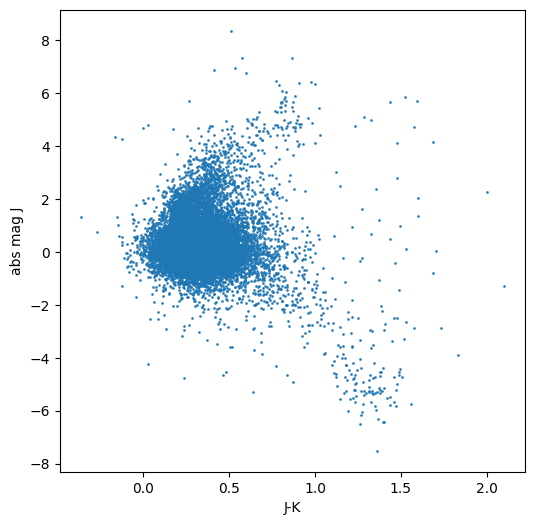

In [79]:
plt.figure(figsize=(6, 6))

plt.scatter(clean_final["J_mag"] - clean_final["K_mag"], clean_final["abs_mag_J"], marker='o', s=1, alpha = 0.85)
plt.xlabel("J-K")
plt.ylabel("abs mag J")
plt.show()

In [80]:
eclipsing = clean_final[(clean_final["ML_classifier_type"] == "EB_ED") | (clean_final["ML_classifier_type"] == "EB_EC") | (clean_final["ML_classifier_type"] == "EB_ESD")]
eclipsing

ASASSN_id  distance  distance_low  distance_high   J_mag  J_mag_err  \
26     154619831684       788           780            796  12.763      0.035   
70     549756977370       745           733            757  10.660      0.022   
73     180388861098       905           884            925  11.353      0.023   
76     214748600537       335           334            338   9.090      0.026   
80           388378      1023          1008           1042  12.573      0.023   
...             ...       ...           ...            ...     ...        ...   
25277  661428869046      5401          4931           6137  13.234      0.023   
25296   60130144089      2815          2705           2931  11.311      0.022   
25350  137440314659      3049          2890           3227  13.315      0.024   
25364   85900846962      6174          5395           7769  14.142      0.031   
25381  515396509280      5363          4795           6161  13.086      0.024   

        K_mag  K_mag_err  abs_mag_J  abs_mag_J_low  ...  ext_correct_K_low  \
26     12.440      0.039      3.249          3.272  ...              0.013   
70     10.414      0.019      1.299          1.334  ...              0.000   
73     11.123      0.022      1.512          1.563  ...              0.025   
76      8.851      0.019      1.451          1.457  ...              0.006   
80     12.019      0.022      2.184          2.216  ...              0.146   
...       ...        ...        ...            ...  ...                ...   
25277  12.924      0.030     -0.529         -0.332  ...              0.043   
25296  10.968      0.022     -2.093         -2.007  ...              0.496   
25350  12.997      0.030      0.771          0.888  ...              0.053   
25364  13.655      0.045      0.059          0.352  ...              0.056   
25381  12.870      0.029     -0.561         -0.318  ...              0.000   

       ext_correct_K_high  FinalType  ML_classifier_type  \
26                  0.013   CONSTANT               EB_ED   
70                  0.000        RRC               EB_ED   
73                  0.025         EW               EB_EC   
76                  0.006        RRC               EB_ED   
80                  0.146         EW              EB_ESD   
...                   ...        ...                 ...   
25277               0.043         EW              EB_ESD   
25296               0.500         EW               EB_EC   
25350               0.053         EW               EB_EC   
25364               0.056         EW              EB_ESD   
25381               0.000         EA               EB_ED   

       visual_classification_type  VSX_type  \
26                       constant       RR:   
70                            RRC       RRC   
73                             EW    EC|RRC   
76                            RRC    RRC|EC   
80                             EW       RRC   
...                           ...       ...   
25277                         NaN   RRAB/BL   
25296                         NaN       RRC   
25350                         NaN       RRC   
25364                         NaN   RRAB/BL   
25381                         NaN   RRAB/BL   

                                                 VSX_RA VSX_Dec VSX_name  \
26                              0.97629 -75.83206 NSV 8     NaN      NaN   
70       2.61108 -24.96700 ASASSN-V J001026.66-245801.2     NaN      NaN   
73                2.80154 +22.23589 ASAS J001113+2214.2     NaN      NaN   
76                2.87817 +19.66019 ASAS J001131+1939.6     NaN      NaN   
80              3.22345 +64.30151 WISE J001253.6+641805     NaN      NaN   
...                                                 ...     ...      ...   
25277          356.37149 +41.31223 CSS_J234529.1+411844     NaN      NaN   
25296  357.20726 +60.47946 ASASSN-V J234849.74+602846.1     NaN      NaN   
25350  358.70001 +53.99216 ASASSN-V J235448.00+535931.8     NaN      NaN   
25364    359.17987 +49.15463 1SWASP J235643.15+490916.

In [81]:
errors = clean_final[((clean_final["distance_high"] - clean_final["distance_low"]) / clean_final["distance"]) < 0.3]
errors

ASASSN_id  distance  distance_low  distance_high   J_mag  J_mag_err  \
0        8590948612      3778          3484           4082  12.151      0.022   
4      661428842978      4131          3828           4440  13.082      0.031   
7      249108450355      2828          2736           2936  12.344      0.022   
8      111669995433      2382          2316           2472  12.289      0.023   
11      51540332578      2130          2072           2191  11.791      0.027   
...             ...       ...           ...            ...     ...        ...   
25390  137440324131      4474          4150           4908  13.629      0.027   
25391  661428930020      3221          3032           3469  13.715      0.027   
25393  472447133837      4426          4108           4813  13.445      0.025   
25394  283468348278      4310          3755           4843  14.001      0.027   
25397   94490254633      5823          5081           6654  14.196      0.035   

        K_mag  K_mag_err  abs_mag_J  abs_mag_J_low  ...  ext_correct_K_low  \
0      11.815      0.023     -0.771         -0.595  ...              0.015   
4      12.683      0.027     -0.099          0.066  ...              0.043   
7      12.116      0.021      0.058          0.129  ...              0.012   
8      12.073      0.021      0.324          0.385  ...              0.034   
11     11.356      0.020     -0.140         -0.078  ...              0.123   
...       ...        ...        ...            ...  ...                ...   
25390  13.306      0.037      0.260          0.423  ...              0.050   
25391  13.337      0.035      1.062          1.205  ...              0.043   
25393  13.195      0.031      0.215          0.377  ...              0.000   
25394  13.809      0.056      0.829          1.128  ...              0.000   
25397  13.776      0.050      0.298          0.594  ...              0.031   

       ext_correct_K_high  FinalType  ML_classifier_type  \
0                   0.015       RRAB              RRL_ab   
4                   0.043       RRAB              RRL_ab   
7                   0.012       RRAB              RRL_ab   
8                   0.034        RRC               RRL_c   
11                  0.124       RRAB              RRL_ab   
...                   ...        ...                 ...   
25390               0.050        RRC               RRL_c   
25391               0.059        RRC               RRL_c   
25393               0.000     NONVAR              NonVar   
25394               0.000        RRC               RRL_c   
25397               0.031        RRC               RRL_c   

       visual_classification_type  VSX_type  \
0                             NaN      RRAB   
4                             NaN      RRAB   
7                             NaN      RRAB   
8                             NaN       RRC   
11                            NaN      RRAB   
...                           ...       ...   
25390                         NaN       RRC   
25391                         NaN       RRC   
25393                         NaN       RRC   
25394                         NaN       RRC   
25397                         NaN       RRC   

                                                 VSX_RA VSX_Dec VSX_name  \
0                              0.01521 +35.36286 GM And     NaN      NaN   
4                        0.09900 +36.32870 NSVS 6313844     NaN      NaN   
7                              0.14829 +26.66375 GV Peg     NaN      NaN   
8         0.18471 +37.84283 ROTSE1 J000044.33 +375034.2     NaN      NaN   
11                             0.27937 +58.55164 EW Cas     NaN      NaN   
...                                                 ...     ...      ...   
25390                        359.77146 +54.01686 QY Cas     NaN      NaN   
25391   359.80239 +53.94432 PS1-3PI J235912.57+535639.5     NaN      NaN   
25393           359.93546 +17.65683 ASAS J235945+1739.5     NaN      NaN   
25394  359.93652 -11.75557 ASASSN-V J235944.77-114520.

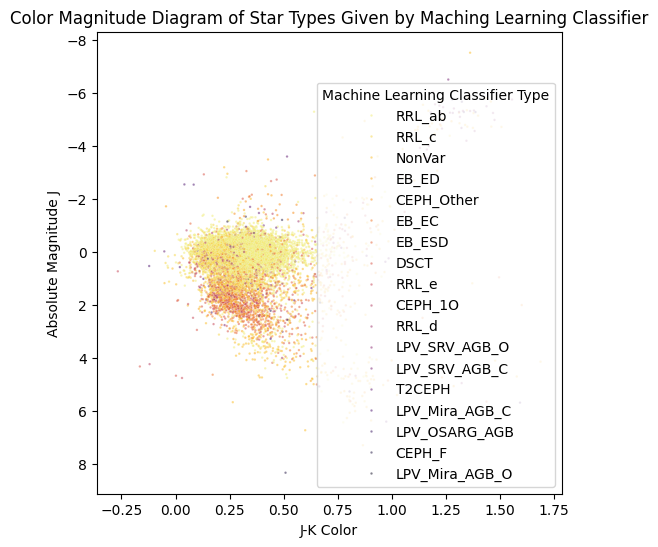

In [82]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=errors, hue="ML_classifier_type", alpha=0.5, s=3, palette="inferno_r")
plt.gca().invert_yaxis()
plt.title("Color Magnitude Diagram of Star Types Given by Maching Learning Classifier")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Machine Learning Classifier Type")

# plt.savefig('test_ml_types.eps', format='eps', dpi=1000)

Text(0, 0.5, 'Absolute Magnitude J')

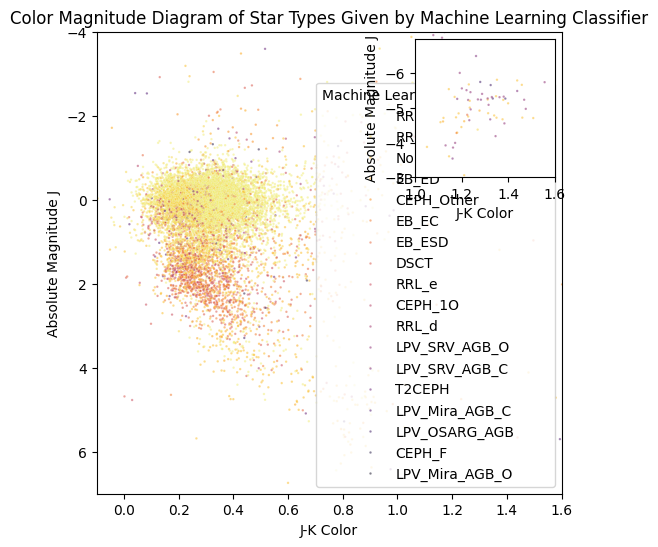

In [83]:
# Main plot
plt.figure(figsize=(6, 6))
scatter_plot = sns.scatterplot(
    x="J_minus_K", 
    y="abs_mag_J", 
    data=errors, 
    hue="ML_classifier_type", 
    alpha=0.5, 
    s=3, 
    palette="inferno_r"
)
plt.gca().invert_yaxis()
plt.title("Color Magnitude Diagram of Star Types Given by Machine Learning Classifier")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Machine Learning Classifier Type", loc="lower right")
plt.xlim(-0.1, 1.6)
plt.ylim(7, -4)

# Adding an inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define inset location and size
ax_inset = inset_axes(plt.gca(), width="30%", height="30%", loc="upper right")
sns.scatterplot(
    x="J_minus_K", 
    y="abs_mag_J", 
    data=errors, 
    hue="ML_classifier_type", 
    alpha=0.5, 
    s=3, 
    palette="inferno_r", 
    legend=False, 
    ax=ax_inset
)

# Adjust inset axis limits (zoomed area)
ax_inset.set_xlim(1, 1.6)  # Adjust as needed
ax_inset.set_ylim(-3, -7)      # Adjust as needed
#ax_inset.invert_yaxis()
ax_inset.set_xticks(np.arange(1, 1.6, 0.2))
ax_inset.set_yticks(np.arange(-3, -7, -1)) 
ax_inset.set_xlabel("J-K Color")
ax_inset.set_ylabel("Absolute Magnitude J")

# plt.savefig('inset_ml_types_fig.eps', format='eps', dpi=1000)

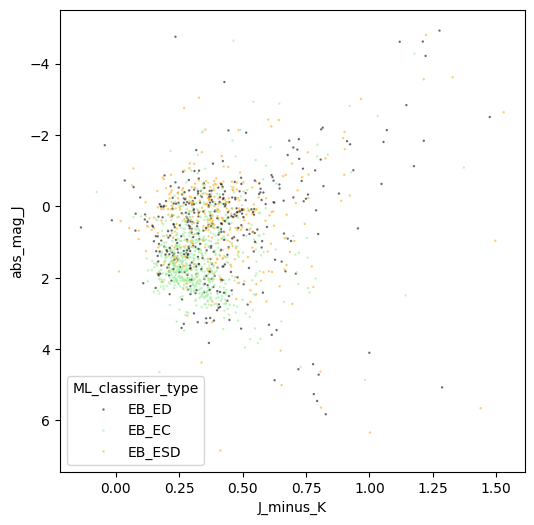

In [84]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=eclipsing, hue="ML_classifier_type", alpha=0.6, s=3, palette=["black", "lightgreen", "orange"])
plt.gca().invert_yaxis()
plt.show()

In [85]:
rr_lyrae = errors[(errors["ML_classifier_type"] == "RRL_ab") | (errors["ML_classifier_type"] == "RRL_c") | (errors["ML_classifier_type"] == "RRL_d")]
rr_lyrae

ASASSN_id  distance  distance_low  distance_high   J_mag  J_mag_err  \
0        8590948612      3778          3484           4082  12.151      0.022   
4      661428842978      4131          3828           4440  13.082      0.031   
7      249108450355      2828          2736           2936  12.344      0.022   
8      111669995433      2382          2316           2472  12.289      0.023   
11      51540332578      2130          2072           2191  11.791      0.027   
...             ...       ...           ...            ...     ...        ...   
25385        563644      2268          2161           2385  13.057      0.025   
25390  137440324131      4474          4150           4908  13.629      0.027   
25391  661428930020      3221          3032           3469  13.715      0.027   
25394  283468348278      4310          3755           4843  14.001      0.027   
25397   94490254633      5823          5081           6654  14.196      0.035   

        K_mag  K_mag_err  abs_mag_J  abs_mag_J_low  ...  ext_correct_K_low  \
0      11.815      0.023     -0.771         -0.595  ...              0.015   
4      12.683      0.027     -0.099          0.066  ...              0.043   
7      12.116      0.021      0.058          0.129  ...              0.012   
8      12.073      0.021      0.324          0.385  ...              0.034   
11     11.356      0.020     -0.140         -0.078  ...              0.123   
...       ...        ...        ...            ...  ...                ...   
25385  12.532      0.023      0.909          1.015  ...              0.158   
25390  13.306      0.037      0.260          0.423  ...              0.050   
25391  13.337      0.035      1.062          1.205  ...              0.043   
25394  13.809      0.056      0.829          1.128  ...              0.000   
25397  13.776      0.050      0.298          0.594  ...              0.031   

       ext_correct_K_high  FinalType  ML_classifier_type  \
0                   0.015       RRAB              RRL_ab   
4                   0.043       RRAB              RRL_ab   
7                   0.012       RRAB              RRL_ab   
8                   0.034        RRC               RRL_c   
11                  0.124       RRAB              RRL_ab   
...                   ...        ...                 ...   
25385               0.161        RRC               RRL_c   
25390               0.050        RRC               RRL_c   
25391               0.059        RRC               RRL_c   
25394               0.000        RRC               RRL_c   
25397               0.031        RRC               RRL_c   

       visual_classification_type  VSX_type  \
0                             NaN      RRAB   
4                             NaN      RRAB   
7                             NaN      RRAB   
8                             NaN       RRC   
11                            NaN      RRAB   
...                           ...       ...   
25385                         NaN       RRC   
25390                         NaN       RRC   
25391                         NaN       RRC   
25394                         NaN       RRC   
25397                         NaN       RRC   

                                                 VSX_RA VSX_Dec VSX_name  \
0                              0.01521 +35.36286 GM And     NaN      NaN   
4                        0.09900 +36.32870 NSVS 6313844     NaN      NaN   
7                              0.14829 +26.66375 GV Peg     NaN      NaN   
8         0.18471 +37.84283 ROTSE1 J000044.33 +375034.2     NaN      NaN   
11                             0.27937 +58.55164 EW Cas     NaN      NaN   
...                                                 ...     ...      ...   
25385         359.63561 +63.87707 WISE J235832.5+635237     NaN      NaN   
25390                        359.77146 +54.01686 QY Cas     NaN      NaN   
25391   359.80239 +53.94432 PS1-3PI J235912.57+535639.5     NaN      NaN   
25394  359.93652 -11.75557 ASASSN-V J235944.77-114520.

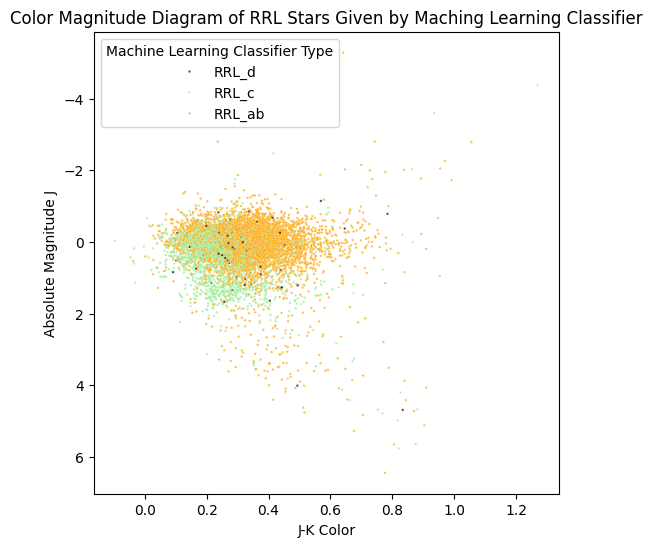

In [86]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae, hue="ML_classifier_type", hue_order=["RRL_d", "RRL_c", "RRL_ab"], alpha=0.7, palette=["black", "lightgreen", "orange"], s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Maching Learning Classifier")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Machine Learning Classifier Type")

# plt.savefig('rrl.eps', format='eps', dpi=1000)

In [87]:
rr_lyrae_ab = rr_lyrae[rr_lyrae["ML_classifier_type"] == "RRL_ab"]

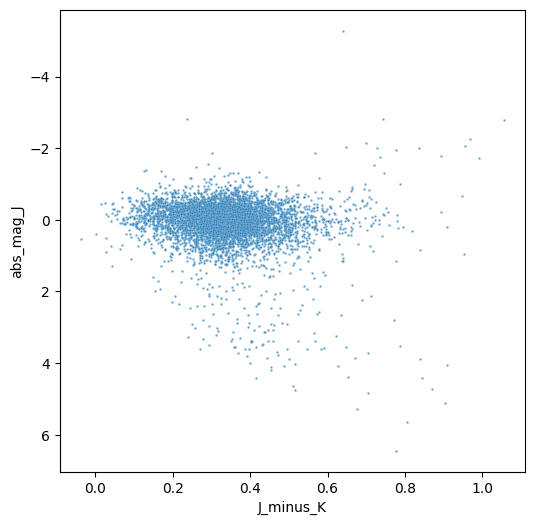

In [88]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae_ab, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [89]:
rr_lyrae_c = rr_lyrae[rr_lyrae["ML_classifier_type"] == "RRL_c"]

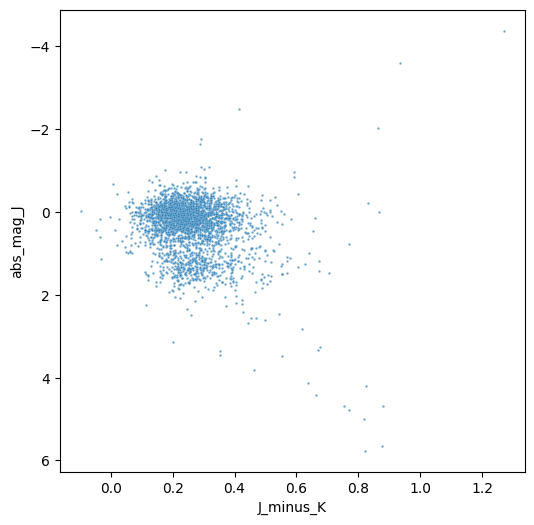

In [90]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae_c, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [91]:
rr_lyrae_d = rr_lyrae[rr_lyrae["ML_classifier_type"] == "RRL_d"]

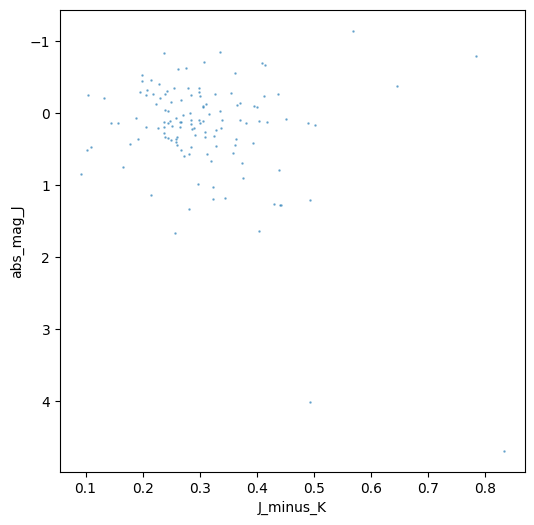

In [92]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae_d, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [93]:
clean_final["visual_classification_type"].unique()

array([nan, 'RRC', 'constant', 'RRab', 'possibly', "I'd", 'EB', 'EW',
       'RR(B)', 'RRAB', 'BY', 'EA', 'SR:', 'SRA', 'const',
       'LPV_Mira_AGB_C', 'SXPHE', 'RS', 'RRC/EW', 'NonVar', 'True', 'L',
       'EB_EC', 'SRB', 'T2CEPH', 'RRAB/CWB', 'DSCT', 'RRd', 'CEPH_1O',
       'needs', 'GDOR:', 'BY:', 'need', 'INS', 'probably', 'GDOR',
       'BY/DCEP', 'EW?', 'likely', 'SR', 'SRD', 'EB_ED', 'RRC/EW?',
       'DCEP', 'RRC?', 'EB_ESD', 'CWA:', 'no', 'corrupted', 'CEP',
       'constant?'], dtype=object)

In [94]:
clean_final_rr = clean_final[(clean_final["visual_classification_type"] == "RRAB") | (clean_final["visual_classification_type"] == "RRab") | (clean_final["visual_classification_type"] == "RRC") | (clean_final["visual_classification_type"] == "RR(B)") | (clean_final["visual_classification_type"] == "RRC/EW") | (clean_final["visual_classification_type"] == "RRAB/CWB") | (clean_final["visual_classification_type"] == "RRd") | (clean_final["visual_classification_type"] == "RRC/EW?") | (clean_final["visual_classification_type"] == "RRC?")]
len(clean_final_rr)

161

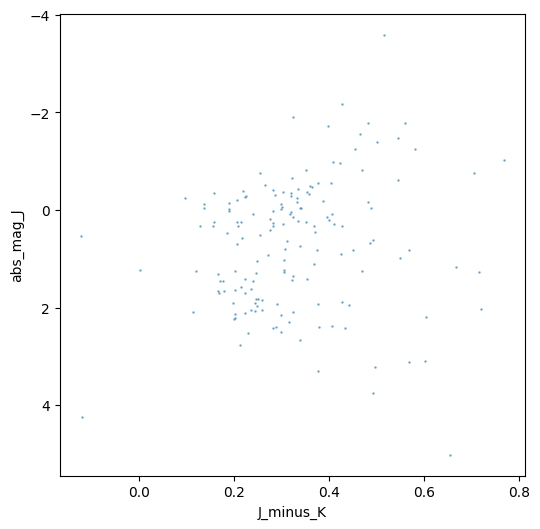

In [95]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=clean_final_rr, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [96]:
rr_lyrae.groupby("ML_classifier_type").agg("count").reset_index()

ML_classifier_type  ASASSN_id  distance  distance_low  distance_high  J_mag  \
0             RRL_ab       6209      6209          6209           6209   6209   
1              RRL_c       2817      2817          2817           2817   2817   
2              RRL_d        127       127           127            127    127   

   J_mag_err  K_mag  K_mag_err  abs_mag_J  ...  ext_correct_K  \
0       6209   6209       6209       6209  ...           6209   
1       2817   2817       2817       2817  ...           2817   
2        127    127        127        127  ...            127   

   ext_correct_K_low  ext_correct_K_high  FinalType  \
0               6209                6209       6209   
1               2817                2817       2817   
2                127                 127        127   

   visual_classification_type  VSX_type  VSX_RA  VSX_Dec  VSX_name  J_minus_K  
0                           0      6209    6209        0         0       6209  
1                           0      2817    2817        0         0       2817  
2                           0       127     127        0         0        127  

[3 rows x 25 columns]

In [97]:
clean_final.groupby("ML_classifier_type").agg("count").reset_index()

ML_classifier_type  ASASSN_id  distance  distance_low  distance_high  \
0             CEPH_1O        153       153           153            153   
1              CEPH_F         80        80            80             80   
2          CEPH_Other        193       193           193            193   
3                DSCT        334       334           334            334   
4               EB_EC        688       688           688            688   
5               EB_ED        390       390           390            390   
6              EB_ESD        345       345           345            345   
7      LPV_Mira_AGB_C         31        31            31             31   
8      LPV_Mira_AGB_O          3         3             3              3   
9       LPV_OSARG_AGB          8         8             8              8   
10      LPV_SRV_AGB_C         14        14            14             14   
11      LPV_SRV_AGB_O         43        43            43             43   
12             NonVar       1246      1246          1246           1246   
13             RRL_ab      13646     13646         13646          13646   
14              RRL_c       4578      4578          4578           4578   
15              RRL_d        262       262           262            262   
16              RRL_e        647       647           647            647   
17             T2CEPH        116       116           116            116   

    J_mag  J_mag_err  K_mag  K_mag_err  abs_mag_J  ...  ext_correct_K  \
0     153        153    153        153        153  ...            153   
1      80         80     80         80         80  ...             80   
2     193        193    193        193        193  ...            193   
3     334        334    334        334        334  ...            334   
4     688        688    688        688        688  ...            688   
5     390        390    390        390        390  ...            390   
6     345        345    345        345        345  ...            345   
7      31         31     31         31         31  ...             31   
8       3          3      3          3          3  ...              3   
9       8          8      8          8          8  ...              8   
10     14         14     14         14         14  ...             14   
11     43         43     43         43         43  ...             43   
12   1246       1246   1246       1246       1246  ...           1246   
13  13646      13646  13646      13646      13646  ...          13646   
14   4578       4578   4578       4578       4578  ...           4578   
15    262        262    262        262        262  ...            262   
16    647        647    647        647        647  ...            647   
17    116        116    116        116        116  ...            116   

    ext_correct_K_low  ext_correct_K_high  FinalType  \
0                 153                 153        153   
1                  80                  80         80   
2                 193                 193        193   
3                 334                 334        334   
4                 688                 688        688   
5                 390                 390        390   
6                 345                 345        345   
7                  31                  31         31   
8                   3                   3          3   
9                   8                   8          8   
10                 14                  14         14   
11                 43                  43         43   
12               1246                1246       1246   
13              13646               13646      13646   
14               4578                4578       4578   
15                262                 262        262   
16                647                 647        647   
17                116                 116        116   

    visual_classification_type  VSX_type  VSX_RA  VSX_Dec  VSX_name  J_minus_K  
0                           35       153   

In [98]:
eclipsing.groupby("ML_classifier_type").agg("count").reset_index()

ML_classifier_type  ASASSN_id  distance  distance_low  distance_high  J_mag  \
0              EB_EC        688       688           688            688    688   
1              EB_ED        390       390           390            390    390   
2             EB_ESD        345       345           345            345    345   

   J_mag_err  K_mag  K_mag_err  abs_mag_J  ...  ext_correct_K  \
0        688    688        688        688  ...            688   
1        390    390        390        390  ...            390   
2        345    345        345        345  ...            345   

   ext_correct_K_low  ext_correct_K_high  FinalType  \
0                688                 688        688   
1                390                 390        390   
2                345                 345        345   

   visual_classification_type  VSX_type  VSX_RA  VSX_Dec  VSX_name  J_minus_K  
0                         168       688     688        0         0        688  
1                          49       390     390        0         0        390  
2                          36       345     345        0         0        345  

[3 rows x 25 columns]

In [99]:
errors.groupby("FinalType").agg("count").reset_index()

FinalType  ASASSN_id  distance  distance_low  distance_high  J_mag  \
0               BY         18        18            18             18     18   
1              CEP          1         1             1              1      1   
2          CEPH_1O        104       104           104            104    104   
3           CEPH_F         12        12            12             12     12   
4       CEPH_OTHER         62        62            62             62     62   
5            CONST          3         3             3              3      3   
6         CONSTANT         41        41            41             41     41   
7        CONSTANT?          3         3             3              3      3   
8        CORRUPTED          1         1             1              1      1   
9             CWA:          1         1             1              1      1   
10            DCEP          2         2             2              2      2   
11            DSCT        197       197           197            197    197   
12              EA        192       192           192            192    192   
13              EB         21        21            21             21     21   
14              EW        809       809           809            809    809   
15             EW?          1         1             1              1      1   
16            GDOR          1         1             1              1      1   
17           GDOR:          1         1             1              1      1   
18             I'D          1         1             1              1      1   
19             INS          1         1             1              1      1   
20               L         17        17            17             17     17   
21          LIKELY          2         2             2              2      2   
22  LPV_MIRA_AGB_C         19        19            19             19     19   
23  LPV_MIRA_AGB_O          2         2             2              2      2   
24   LPV_OSARG_AGB          6         6             6              6      6   
25   LPV_SRV_AGB_C          8         8             8              8      8   
26   LPV_SRV_AGB_O         20        20            20             20     20   
27            NEED         13        13            13             13     13   
28           NEEDS          1         1             1              1      1   
29              NO          1         1             1              1      1   
30          NONVAR        562       562           562            562    562   
31        POSSIBLY          7         7             7              7      7   
32        PROBABLY          1         1             1              1      1   
33           RR(B)        129       129           129            129    129   
34            RRAB       6263      6263          6263           6263   6263   
35             RRC       3336      3336          3336           3336   3336   
36          RRC/EW          1         1             1              1      1   
37         RRC/EW?          2         2             2              2      2   
38            RRC?          2         2             2              2      2   
39             RRD          2         2             2              2      2   
40              RS         11        11            11             11     11   
41              SR          3         3             3              3      3   
42             SR:          1         1             1              1      1   
43             SRA          2         2             2              2      2   
44             SRB          1         1             1              1      1   
45             SRD          1         1             1              1      1   
46           SXPHE          1         1             1              1      1   
47          T2CEPH         30        30            30             30     30   
48            TRUE          6         6             6              6      6   

    J_mag_err  K_mag  K_mag_err  abs_mag_J  ...  ext_corre

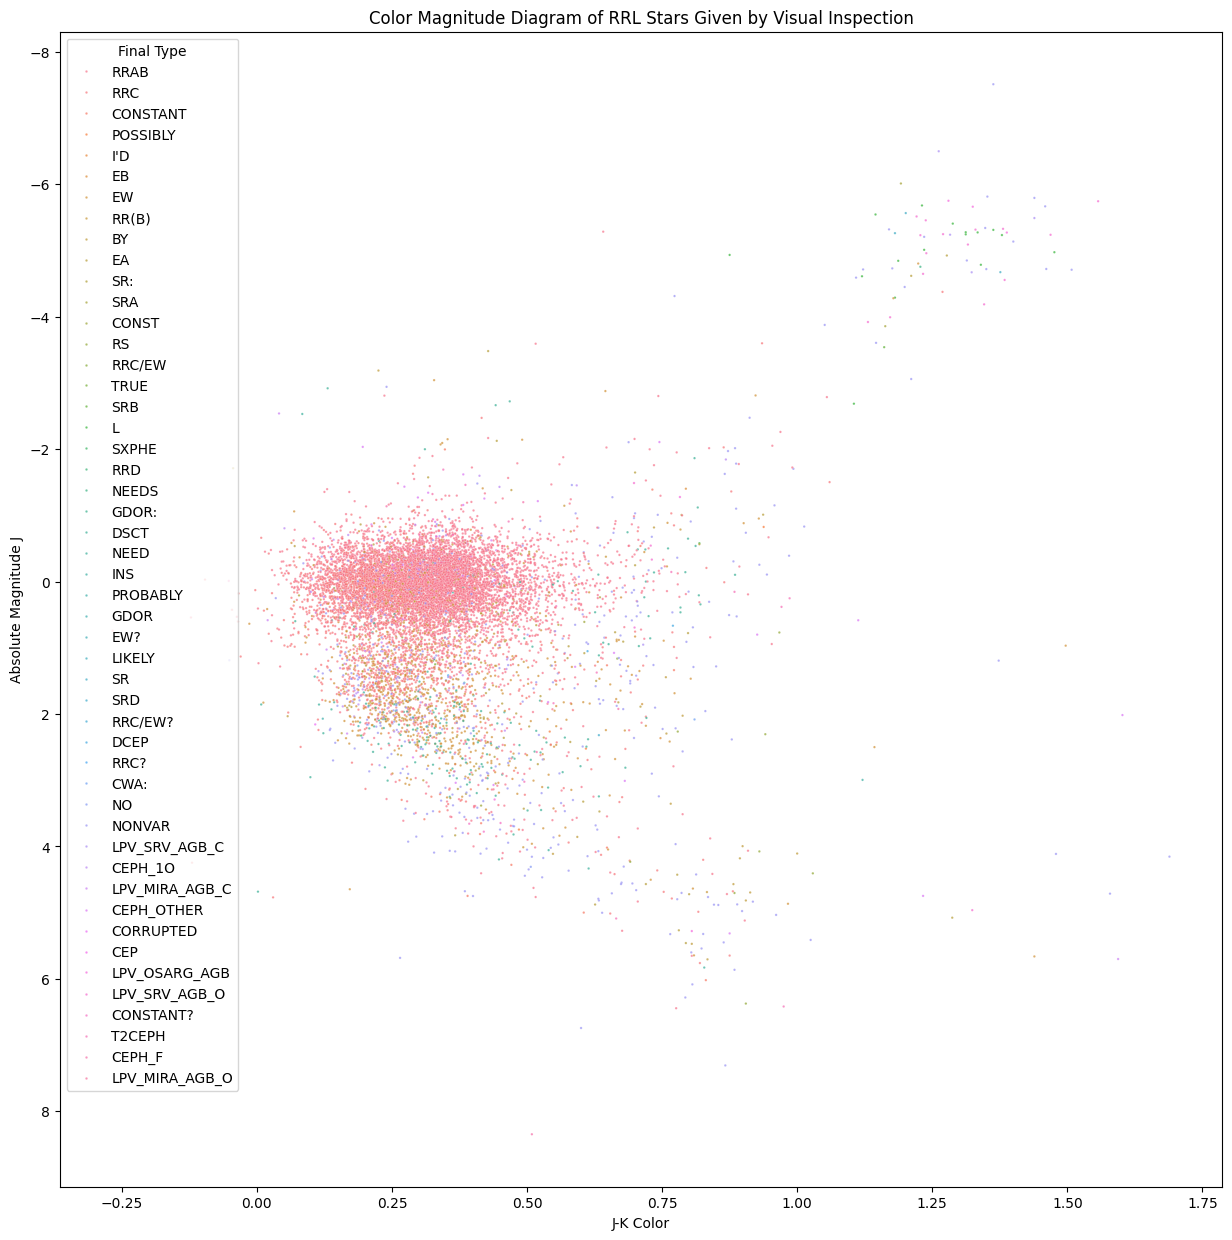

In [103]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=errors, hue="FinalType", alpha=0.7, s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Visual Inspection")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Final Type")